# **Question 1**

# **Original Code**

In [1]:
import torch
import torch .nn as nn
import torch .optim as optim
import torchvision
import torchvision .transforms as transforms
import matplotlib . pyplot as plt

100%|██████████| 170M/170M [00:01<00:00, 98.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/20], Loss: 0.9769820148348808
Epoch [2/20], Loss: 0.9498585961461067
Epoch [3/20], Loss: 0.9361079145073891
Epoch [4/20], Loss: 0.9275502440929413
Epoch [5/20], Loss: 0.9216077747344971
Epoch [6/20], Loss: 0.9172038072347641
Epoch [7/20], Loss: 0.9137905761599541
Epoch [8/20], Loss: 0.911062692463398
Epoch [9/20], Loss: 0.9088332392573356
Epoch [10/20], Loss: 0.9069799973368645
Epoch [11/20], Loss: 0.9054191771149636
Epoch [12/20], Loss: 0.9040910518765449
Epoch [13/20], Loss: 0.902952249288559
Epoch [14/20], Loss: 0.9019685804247856
Epoch [15/20], Loss: 0.9011144083738327
Epoch [16/20], Loss: 0.9003690710663795
Epoch [17/20], Loss: 0.8997162736058235
Epoch [18/20], Loss: 0.8991426773071289
Epoch [19/20], Loss: 0.8986370220184327
Epoch [20/20], Loss: 0.8981903213858604


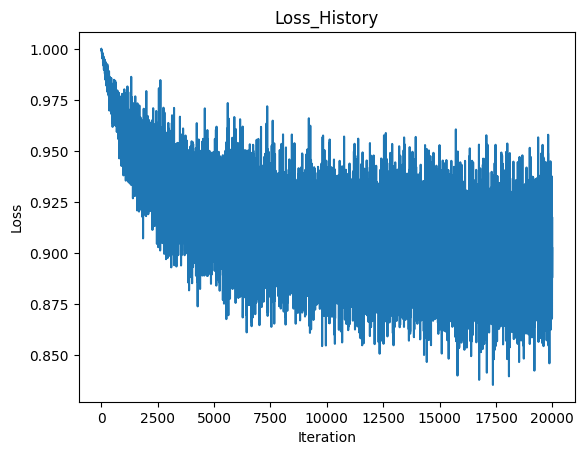

Training_accuracy: 32.21%
Test_accuracy: 32.49%


In [2]:
# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters

Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f'Epoch [{t+1}/{iterations}], Loss: {running_loss / len(trainloader)}')

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss_History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set

correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f'Training_accuracy: {train_acc:.2f}%')

# 6. Calculate Accuracy on Test Set

correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f'Test_accuracy: {test_acc:.2f}%')

# **Middle layer with 100 nodes and a sigmoid activation**

100%|██████████| 170M/170M [00:03<00:00, 50.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 2.0817
Epoch 2/10, Loss: 1.9089
Epoch 3/10, Loss: 1.8476
Epoch 4/10, Loss: 1.8101
Epoch 5/10, Loss: 1.7821
Epoch 6/10, Loss: 1.7595
Epoch 7/10, Loss: 1.7413
Epoch 8/10, Loss: 1.7260
Epoch 9/10, Loss: 1.7125
Epoch 10/10, Loss: 1.7006


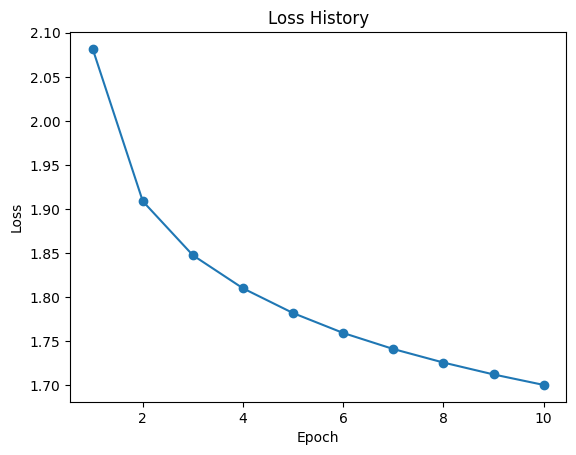

Training Accuracy: 41.35%
Test Accuracy: 41.10%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # 1. Dataloading
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
    batch_size = 50
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 2. Define Network Architecture with Hidden Layer
    class SimpleNet(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(SimpleNet, self).__init__()
            # Define layers
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.sigmoid = nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            x = x.view(x.size(0), -1)  # Flatten input
            x = self.fc1(x)  # First layer
            x = self.sigmoid(x)  # Sigmoid activation
            x = self.fc2(x)  # Output layer
            return x

    # Model parameters
    input_size = 3 * 32 * 32  # CIFAR-10 image size (flattened)
    hidden_size = 100  # Hidden layer size
    output_size = 10  # Number of classes

    # Instantiate model, loss function, and optimizer
    model = SimpleNet(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005)  # Weight decay for L2 regularization

    # 3. Training Loop
    num_epochs = 10
    loss_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += loss.item()

        # Average loss for the epoch
        epoch_loss = running_loss / len(trainloader)
        loss_history.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # 4. Plotting the Loss History
    plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # 5. Calculate Training Accuracy
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
    train_acc = 100 * correct_train / total_train
    print(f"Training Accuracy: {train_acc:.2f}%")

    # 6. Calculate Test Accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    print(f"Test Accuracy: {test_acc:.2f}%")

# **Question 2**

# *LeNet-5 network for MNIST*

Using device: cpu
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 35.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.07MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.26MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.37MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/10, Loss: 0.2023
Epoch 2/10, Loss: 0.0596
Epoch 3/10, Loss: 0.0428
Epoch 4/10, Loss: 0.0313
Epoch 5/10, Loss: 0.0257
Epoch 6/10, Loss: 0.0206
Epoch 7/10, Loss: 0.0173
Epoch 8/10, Loss: 0.0150
Epoch 9/10, Loss: 0.0133
Epoch 10/10, Loss: 0.0100


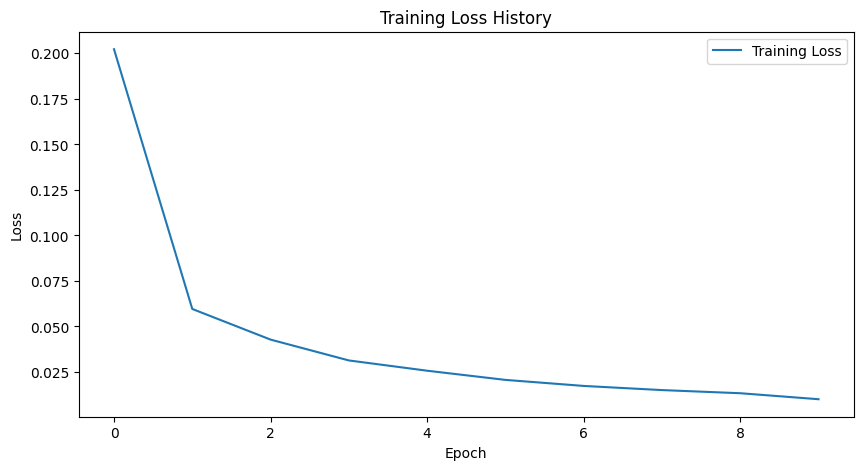

Training accuracy: 99.81%
Test accuracy: 98.91%


In [2]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Data loading and transformation for MNIST
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # LeNet-5 uses 32x32 input
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # First convolutional layer: 1 input channel, 6 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # Remove padding=2
        # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # The 5x5 is the size of the feature maps after conv2
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # First conv + activation + pooling
        x = torch.tanh(self.conv1(x))        # Output: 6 x 28 x 28
        x = torch.max_pool2d(x, 2)           # Output: 6 x 14 x 14

        # Second conv + activation + pooling
        x = torch.tanh(self.conv2(x))        # Output: 16 x 10 x 10
        x = torch.max_pool2d(x, 2)           # Output: 16 x 5 x 5

        # Flatten the feature maps
        x = x.view(-1, 16 * 5 * 5)           # Output: batch_size x 400

        # Fully connected layers
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Move the model to the selected device
model = LeNet5().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training the LeNet-5 Model
epochs = 10
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Log the loss for this epoch
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

# 4. Plotting the Training Loss History
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.title("Training Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 5. Calculate Training Accuracy
model.eval()  # Set model to evaluation mode
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_accuracy = 100 * correct_train / total_train
print(f"Training accuracy: {train_accuracy:.2f}%")

# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Test accuracy: {test_accuracy:.2f}%")

# **Question 3**

# *Transfer learning a pre-trained ResNet18 network trained on ImageNet1K to classify hymenoptera dataset.*

In [3]:
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import os
import zipfile
import urllib.request

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Data Preparation
# Download and prepare the dataset in Google Colab
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
data_dir = "./hymenoptera_data"

if not os.path.exists(data_dir):
    urllib.request.urlretrieve(url, "hymenoptera_data.zip")
    with zipfile.ZipFile("hymenoptera_data.zip", 'r') as zip_ref:
        zip_ref.extractall(".")

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the training and validation datasets
train_dataset = datasets.ImageFolder(root=f'{data_dir}/train', transform=transform)
test_dataset = datasets.ImageFolder(root=f'{data_dir}/val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# 2. Load Pre-trained ResNet18 Model
resnet18 = models.resnet18(pretrained=True)

# (a) Fine-Tuning
# Replace the final layer to classify two classes (ants and bees)
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 2)
resnet18 = resnet18.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

# Training Loop for Fine-Tuning
num_epochs = 10
resnet18.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate and print training accuracy
    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

# Testing the Fine-Tuned Model
resnet18.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f'Fine-Tuning Test Accuracy: {test_accuracy:.2f}%')

# (b) Feature Extraction
# Reload pre-trained ResNet18 and freeze all parameters
resnet18 = models.resnet18(pretrained=True)
for param in resnet18.parameters():
    param.requires_grad = False

# Replace the final layer for 2-class classification
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 2)
resnet18 = resnet18.to(device)

# Define optimizer for the final layer only
optimizer = optim.SGD(resnet18.fc.parameters(), lr=0.001, momentum=0.9)

# Training Loop for Feature Extraction
resnet18.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate and print training accuracy
    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

# Testing the Feature Extraction Model
resnet18.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f'Feature Extraction Test Accuracy: {test_accuracy:.2f}%')


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Epoch [1/10], Loss: 0.5266, Training Accuracy: 73.77%
Epoch [2/10], Loss: 0.2219, Training Accuracy: 93.85%
Epoch [3/10], Loss: 0.1545, Training Accuracy: 94.67%
Epoch [4/10], Loss: 0.0854, Training Accuracy: 98.36%
Epoch [5/10], Loss: 0.0671, Training Accuracy: 98.77%
Epoch [6/10], Loss: 0.0317, Training Accuracy: 100.00%
Epoch [7/10], Loss: 0.0194, Training Accuracy: 100.00%
Epoch [8/10], Loss: 0.0251, Training Accuracy: 100.00%
Epoch [9/10], Loss: 0.0354, Training Accuracy: 99.18%
Epoch [10/10], Loss: 0.0321, Training Accuracy: 100.00%
Fine-Tuning Test Accuracy: 95.42%
Epoch [1/10], Loss: 0.6055, Training Accuracy: 65.16%
Epoch [2/10], Loss: 0.3595, Training Accuracy: 85.66%
Epoch [3/10], Loss: 0.3201, Training Accuracy: 86.07%
Epoch [4/10], Loss: 0.2344, Training Accuracy: 90.98%
Epoch [5/10], Loss: 0.2115, Training Accuracy: 93.44%
Epoch [6/10], Loss: 0.1577, Training Accuracy: 96.31%
Epoch [7/10], Loss: 0.1626, Training Accuracy: 93.44%
Epoch [8/10], Loss: 0.1629, Training Accura